# L12 - Decision Trees

Importando as bibliotecas

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree

Atribuindo a um DataFrame os dados do arquivo breast_cancer.csv

In [181]:
df = pd.read_csv('https://raw.githubusercontent.com/jefferson-oliva/databases/main/breast_cancer.csv')
df.head()

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


Verificando a quantidade de linhas e colunas do DataFrame

In [182]:
df.shape

(569, 32)

Verificando quais os valores distintos da coluna "diagnosis"

In [183]:
df['diagnosis'].unique()

array(['malignant', 'benign'], dtype=object)

Substituindo os valores das classes benign e malignant para valores numéricos

In [184]:
d = {'benign': 0, 
     'malignant': 1}

df['diagnosis'] = df['diagnosis'].map(d)

Verificando os nomes das colunas/características do DataFrame

In [185]:
df.columns

Index(['sample_id', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'diagnosis'],
      dtype='object')

Atribuindo os valores e labels as varáveis X e y

In [186]:
# características escolhidas: mean_texture, mean_area, worst_texture e worst_area
features = [2, 4, 22, 24]

X = df.iloc[:, features].values
y = df['diagnosis'].values

Armazenando os dados de treino e teste

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=123, stratify=y)

Verificando a divisão dos dados de treino e teste

In [188]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [357 212]
Labels counts in y_train: [250 148]
Labels counts in y_test: [107  64]


Criando a pipeline

In [189]:
pipe = Pipeline([
    ('z-score', StandardScaler()),
    ('reduce_dim', PCA(n_components=4)),
    ('decision_tree', DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1))
])

Realizando o treinamento

In [190]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=4)),
                ('decision_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        random_state=1))])

Verificando a acurácia dos dados de treino

In [191]:
y_train_pred = pipe.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.9246231155778895

Verificando a acurácia dos dados de teste

In [192]:
y_test_pred = pipe.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9239766081871345

Atribundo os parâmetros ao Gridsearch

In [193]:
tree__criterion = ['gini', 'entropy']
max_depth = [2, 3, 4]
n_components = [1, 2, 3, 4]
param_grid = {
    'reduce_dim__n_components': n_components,
    'decision_tree__criterion': tree__criterion,
    'decision_tree__max_depth': max_depth
}

grid = GridSearchCV(pipe, cv=2, n_jobs=1, param_grid=param_grid, scoring='accuracy')

Realizando o treinamento

In [194]:
grid.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('z-score', StandardScaler()),
                                       ('reduce_dim', PCA(n_components=4)),
                                       ('decision_tree',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               max_depth=3,
                                                               random_state=1))]),
             n_jobs=1,
             param_grid={'decision_tree__criterion': ['gini', 'entropy'],
                         'decision_tree__max_depth': [2, 3, 4],
                         'reduce_dim__n_components': [1, 2, 3, 4]},
             scoring='accuracy')

Exibindo os resultados

In [195]:
print(grid.cv_results_)

{'mean_fit_time': array([0.00199413, 0.00249517, 0.00099742, 0.00249374, 0.00299215,
       0.00249338, 0.00199521, 0.00199425, 0.00202441, 0.00149345,
       0.00299466, 0.0025121 , 0.00199437, 0.00176203, 0.00148261,
       0.00199437, 0.00199449, 0.00199473, 0.00349045, 0.00249362,
       0.00149572, 0.00199437, 0.00099802, 0.00099742]), 'std_fit_time': array([2.38418579e-07, 5.01036644e-04, 1.19209290e-07, 4.98652458e-04,
       2.38418579e-07, 4.98771667e-04, 1.19209290e-07, 3.57627869e-07,
       9.53674316e-07, 5.00917435e-04, 2.50339508e-06, 4.80294228e-04,
       4.76837158e-07, 2.31385231e-04, 4.82678413e-04, 2.38418579e-07,
       1.19209290e-07, 9.96708870e-04, 4.98294830e-04, 4.98533249e-04,
       4.98890877e-04, 2.38418579e-07, 7.15255737e-07, 1.19209290e-07]), 'mean_score_time': array([0.        , 0.0009954 , 0.00099707, 0.00099719, 0.00049949,
       0.00049853, 0.        , 0.        , 0.00048375, 0.00049865,
       0.00049865, 0.00099921, 0.        , 0.00051749, 0.000

Exibindo as médias do conjunto de dados de teste

In [196]:
grid.cv_results_['mean_test_score']

array([0.88693467, 0.88693467, 0.88693467, 0.88693467, 0.84422111,
       0.89698492, 0.90703518, 0.90201005, 0.85175879, 0.89447236,
       0.89447236, 0.90703518, 0.88944724, 0.88190955, 0.88190955,
       0.88190955, 0.87688442, 0.88944724, 0.90452261, 0.9120603 ,
       0.86934673, 0.8919598 , 0.90954774, 0.9120603 ])

Exibindo os melhores parâmetros

In [197]:
print(grid.best_score_)
print(grid.best_params_)

0.9120603015075377
{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 3, 'reduce_dim__n_components': 4}


Verificando a acurácia dos dados de teste

In [198]:
clf = grid.best_estimator_
y_test_pred = clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9239766081871345

Normalizando os dados

In [199]:
dtc = DecisionTreeClassifier(criterion=grid.best_params_['decision_tree__criterion'], 
                             max_depth=grid.best_params_['decision_tree__max_depth'])

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

pca = PCA(n_components=grid.best_params_['reduce_dim__n_components'])
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

dtc.fit(X_train_pca, y_train)

y_test_pred_norm = dtc.predict(X_test_pca)
accuracy_score(y_test, y_test_pred_norm)

0.8947368421052632

Exibindo a árvore de decisão

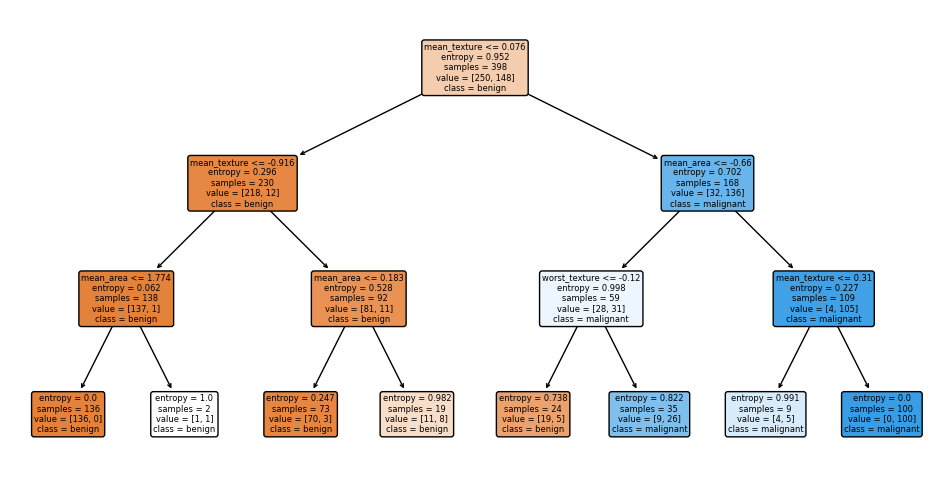

In [200]:
classes = ['benign', 'malignant'] # 0 e 1
features = df.columns[[2, 4, 22, 24]] # mean_texture, mean_area, worst_texture e worst_area

plt.figure(figsize=(12, 6))

plot_tree(dtc, filled=True, rounded=True,
          class_names=classes,
          feature_names=features,
          fontsize=6
         ) 

plt.show()

Definindo a amostra única

In [201]:
print(np.shape(X_test_pca))
print(np.shape(y_test))

X_test1 = X_test_pca[1,:]
y_test1 = y_test[1]

print(np.shape(X_test1))
print(np.shape(y_test1))

X_test1 = np.reshape(X_test1,(1,-1))
y_test1 = np.reshape(y_test1,(1))

print(np.shape(X_test1))
print(np.shape(y_test1))

(171, 4)
(171,)
(4,)
()
(1, 4)
(1,)


Verificando o resultado da amostra única

In [202]:
y_test1_pred  = clf.predict(X_test1)
print("Classe: ", y_test1_pred)
print("Acurácia: ", accuracy_score(y_test1, y_test1_pred))
print("Características: ", X_test1.round(3))

Classe:  [0]
Acurácia:  1.0
Características:  [[-2.743  0.724 -0.056  0.111]]


### Interpretação da amostra:

Valores das características:
- mean_texture = -2.743
- mean_area = 0.724
- worst_texture = -0.056
- worst_area = 0.111

Condicionais:

- **mean_texture** é menor ou igual a 0.076? **Sim**, então desce o nível para o lado esquerdo.
    
- **mean_texture** é menor ou igual a -0.916? **Sim**, então desce o nível para o lado esquerdo.
    
- **mean_area** é menor ou igual a 1.774? **Sim**, então desce o nível para o lado esquerdo.

Resultado:

class = benign (0)